In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [274]:

# df=pd.read_csv('HAR_Test.csv') 

Dataset for TRaining **Durting train uncomment**

In [307]:
df=pd.read_csv('HAR.csv')


Dataset for Testing **Durting train comment**

In [308]:
df.head()

,timeElapsed,x,y,z,label
0,0.0,0.141495,1.025558,0.085266,Standing
1,1.0,0.155807,1.030487,0.090134,Standing
2,2.0,0.161728,1.031693,0.098663,Standing
3,3.0,0.160599,1.019730,0.097275,Standing
4,4.0,0.162506,0.987411,0.105499,Standing


In [309]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [310]:
df['label'].value_counts()

Walking       349176
Sitting       343256
Standing      313697
Upstairs      160082
Jogging       136415
Downstairs    134354
Name: label, dtype: int64

In [311]:
df['label'].unique()

array(['Standing ', 'Sitting ', 'Jogging', 'Upstairs ', 'Walking',
       'Downstairs'], dtype=object)

## Plot Axies of Accelerometer Dataset 

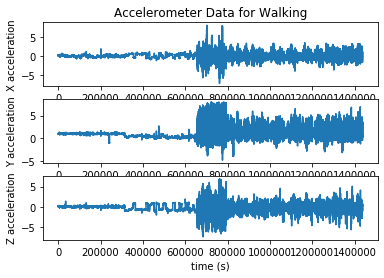

<Figure size 720x720 with 0 Axes>

In [312]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [239]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [240]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [241]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

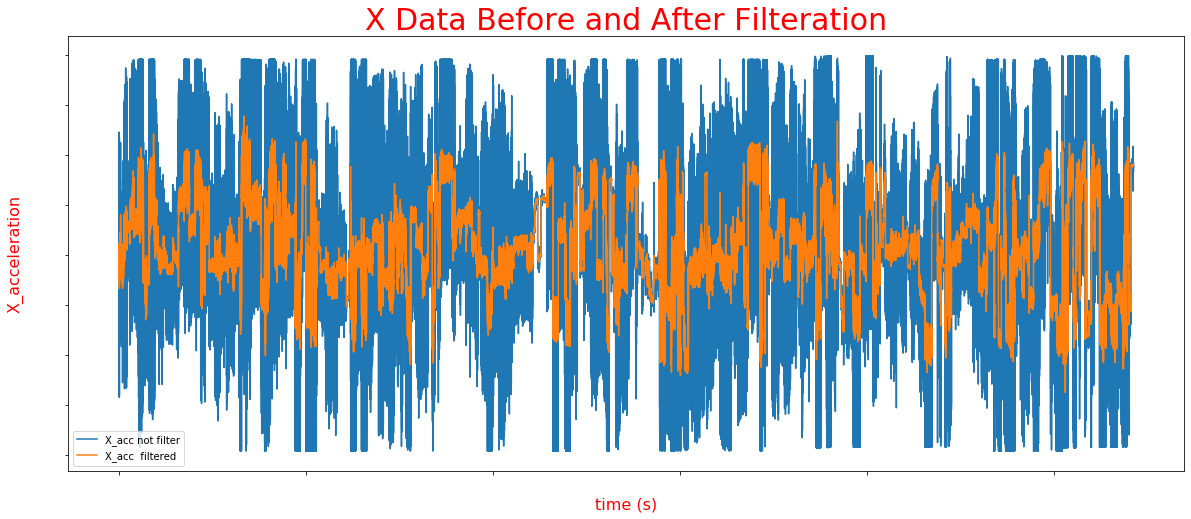

In [242]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


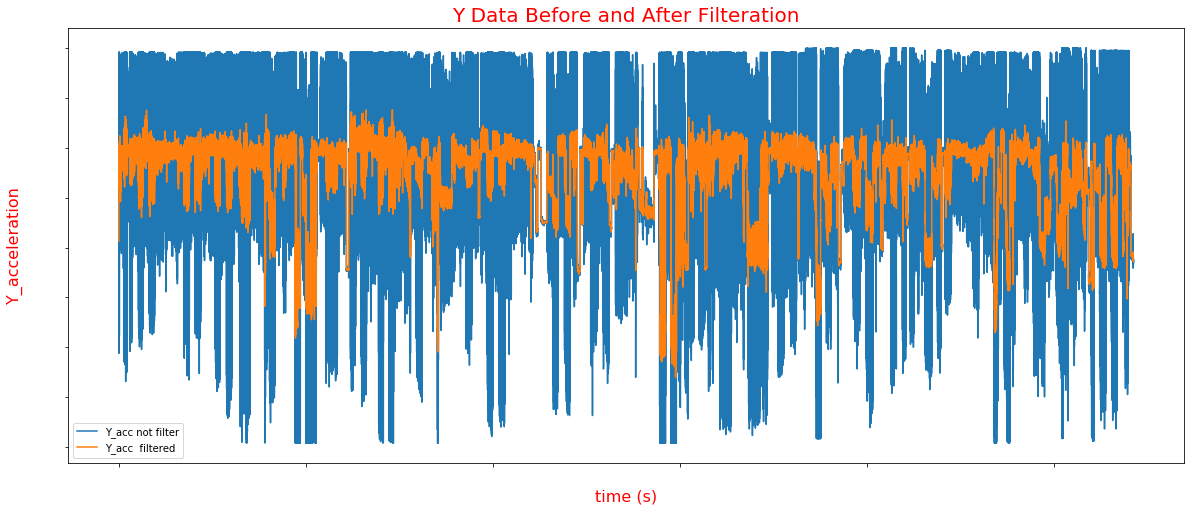

In [243]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

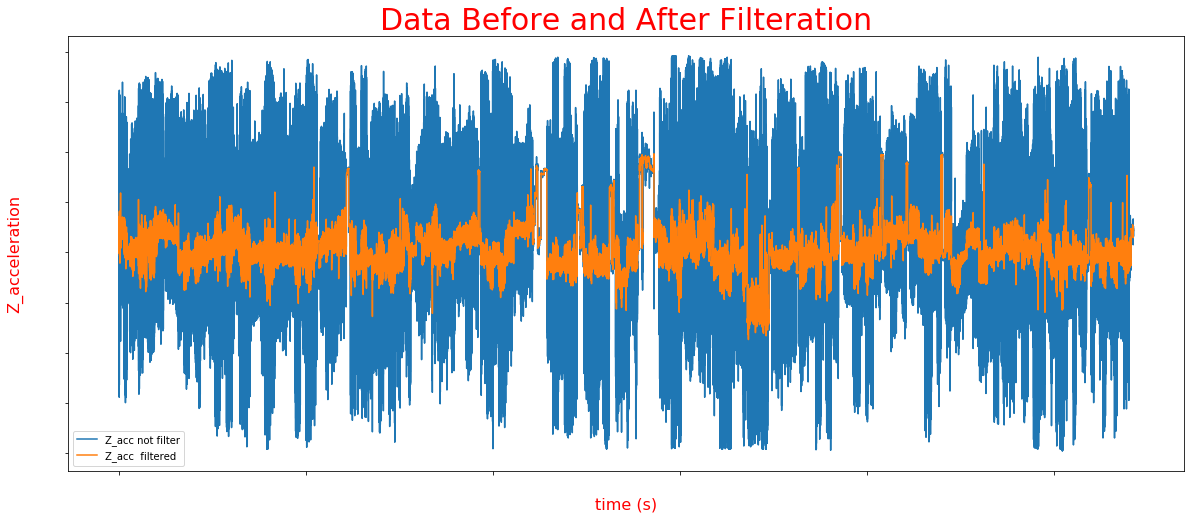

In [244]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [245]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


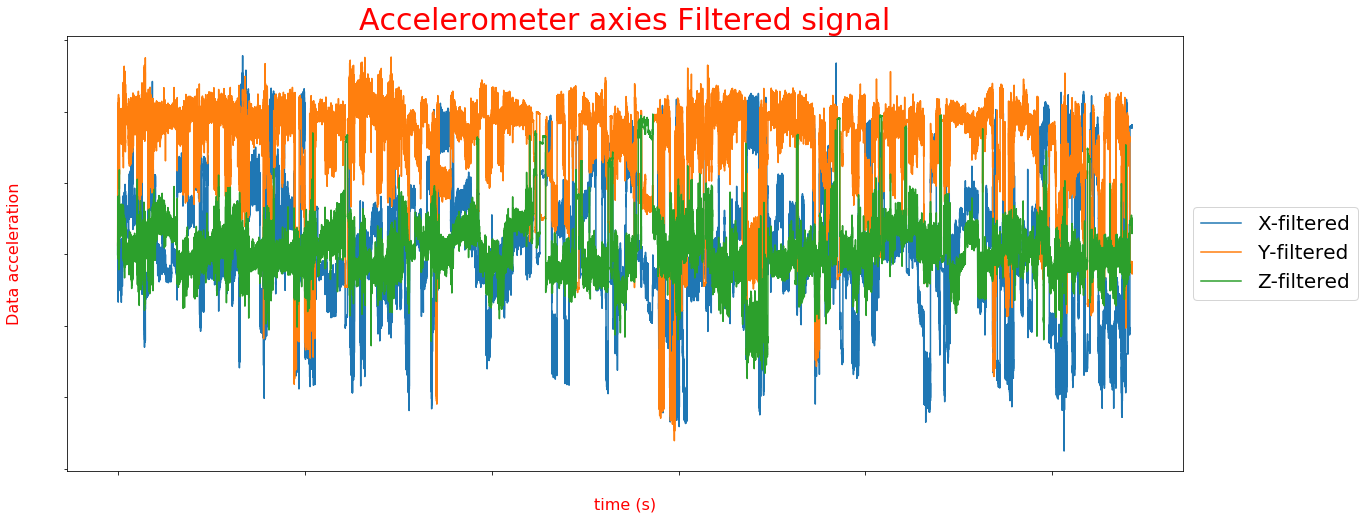

In [246]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

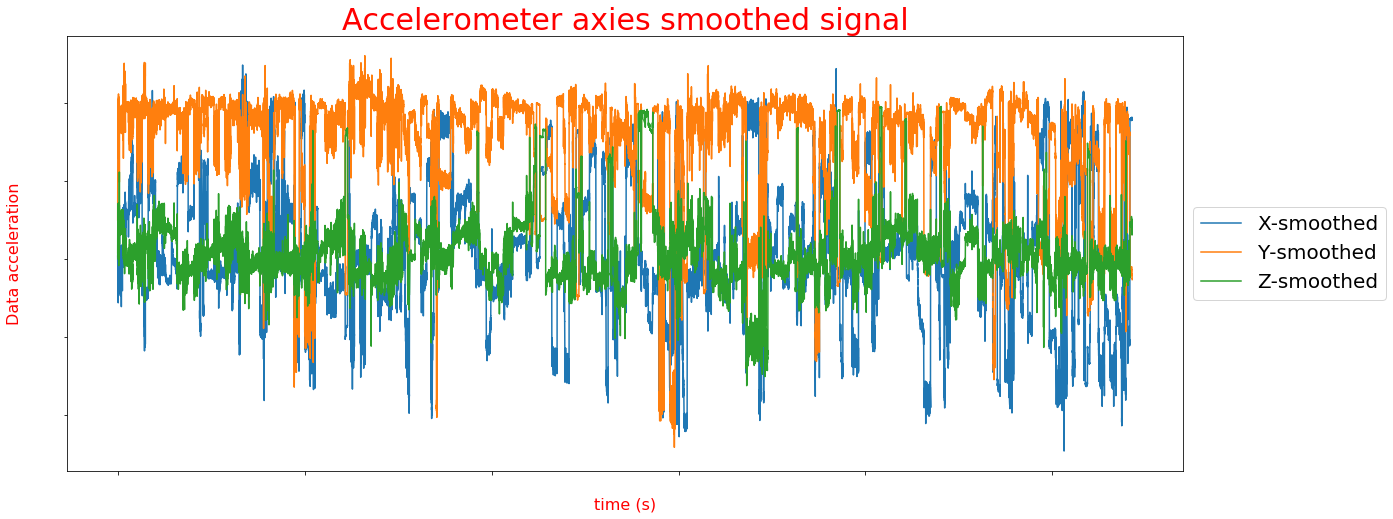

In [247]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [248]:
X_smoothed_powered=np.power(X_smoothed,2)
Y_smoothed_powered=np.power(Y_smoothed,2)
Z_smoothed_powered=np.power(Z_smoothed,2)


In [249]:
Y_smoothed_powered

array([6.24277074, 6.44209223, 6.84079769, ..., 1.74854819, 1.7518388 ,
       1.7535105 ])

In [250]:
X_max=np.sum(X_smoothed_powered)
Y_max=np.sum(Y_smoothed_powered)
Z_max=np.sum(Z_smoothed_powered)

if (X_max >= Y_max) and (X_max >= Z_max):
       print('x')
elif (Y_max >= X_max) and (Y_max >= Z_max):
       print('y')
else:
       print('z')

y


In [251]:
FD=Y_smoothed_powered

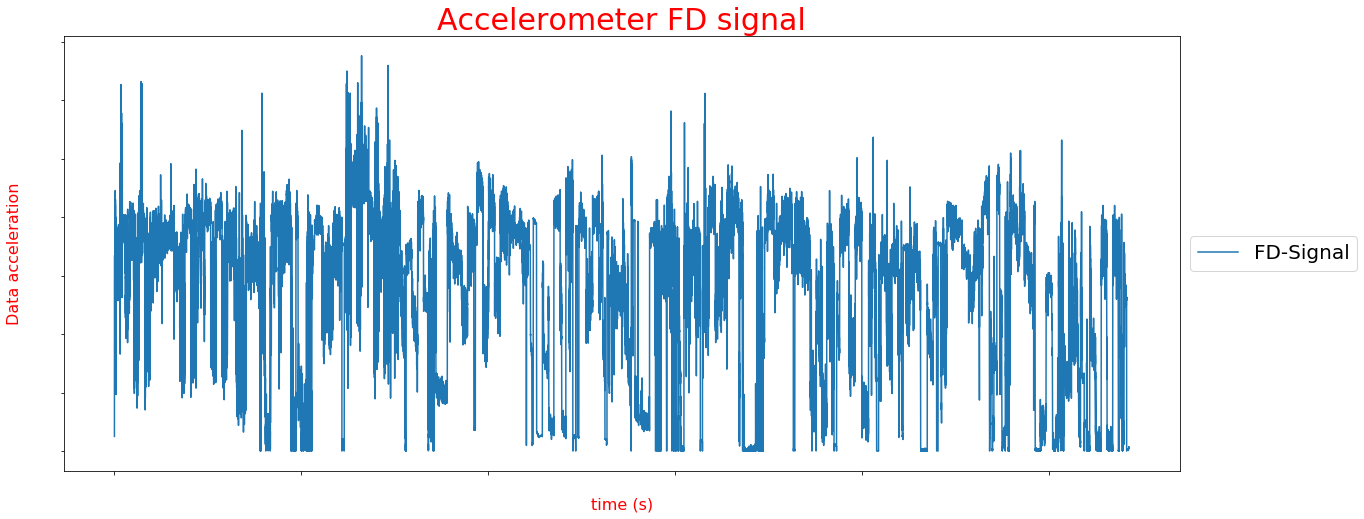

In [252]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='FD-Signal')

plt.title('Accelerometer FD signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [253]:

df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

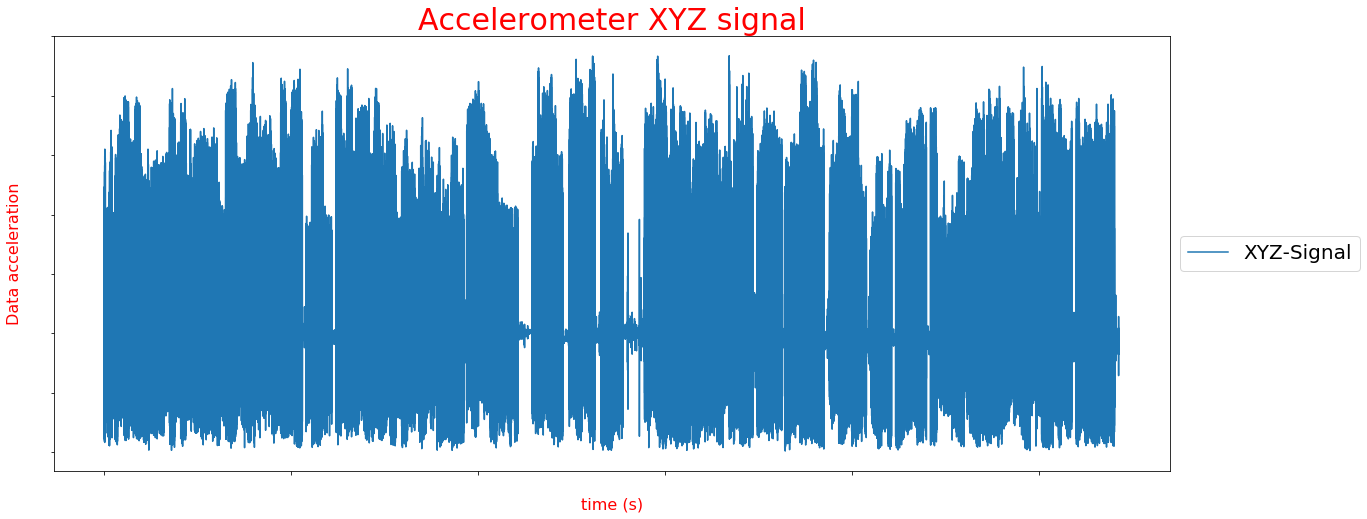

In [254]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')
plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

In [255]:
df_FD=pd.DataFrame(FD)

In [256]:
df_FD['label']=df['label']

In [257]:
df_FD.rename(columns={0:'FD'},inplace=True)

In [258]:
df_FD

,FD,label
0,6.242771,Jogging
1,6.442092,Jogging
2,6.840798,Jogging
3,7.437514,Jogging
4,8.227817,Jogging
...,...,...
1085355,1.737556,Walking
1085356,1.743740,Walking
1085357,1.748548,Walking
1085358,1.751839,Walking


In [313]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['x'].values[i: i + 100]
    ys = df['y'].values[i: i + 100]
    zs = df['z'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [314]:
X_train.shape

(28738, 50)

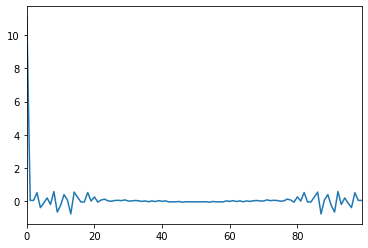

In [315]:
pd.Series(np.fft.fft(pd.Series(x_list)[33])).plot()
plt.show()

In [316]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [317]:
df_New=X_train


In [327]:
X_test = pd.DataFrame()

In [328]:
# Max Indices and Min indices 

# index of max value in time domain
X_test['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
X_test['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
X_test['z_argmax'] = pd.Series(z_list).apply(lambda x: np.argmax(x))

# index of min value in time domain
X_test['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))
X_test['y_argmin'] = pd.Series(y_list).apply(lambda x: np.argmin(x))
X_test['z_argmin'] = pd.Series(z_list).apply(lambda x: np.argmin(x))

# absolute difference between above indices
X_test['x_arg_diff'] = abs(X_test['x_argmax'] - X_test['x_argmin'])
X_test['y_arg_diff'] = abs(X_test['y_argmax'] - X_test['y_argmin'])
X_test['z_arg_diff'] = abs(X_test['z_argmax'] - X_test['z_argmin'])

# index of max value in frequency domain
X_test['x_argmax_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmax_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmax_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

# index of min value in frequency domain
X_test['x_argmin_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmin_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmin_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))

# absolute difference between above indices
X_test['x_arg_diff_fft'] = abs(X_test['x_argmax_fft'] - X_test['x_argmin_fft'])
X_test['y_arg_diff_fft'] = abs(X_test['y_argmax_fft'] - X_test['y_argmin_fft'])
X_test['z_arg_diff_fft'] = abs(X_test['z_argmax_fft'] - X_test['z_argmin_fft'])

In [330]:
X_test.shape

(28738, 18)

## SET Peak And Valley for signal data & Perfom Segmentation 

In [139]:
FD

array([  6.24277074,   6.44209223,   6.84079769, ..., 100.6213144 ,
       100.6745643 , 100.70229484])

Get Inverse of peak to find Valley 


In [141]:
from scipy.signal import find_peaks
peak_x= find_peaks(FD)[0]  ##Detect Pe
#valley, _ = find_peaks(inv_peak) ##detect valley

In [142]:
FD.mean()

73.61410804610082

In [143]:
list_of_valley=list(peak_x)

In [117]:
len(list_of_valley)

13775

In [118]:
t=df['timeElapsed']

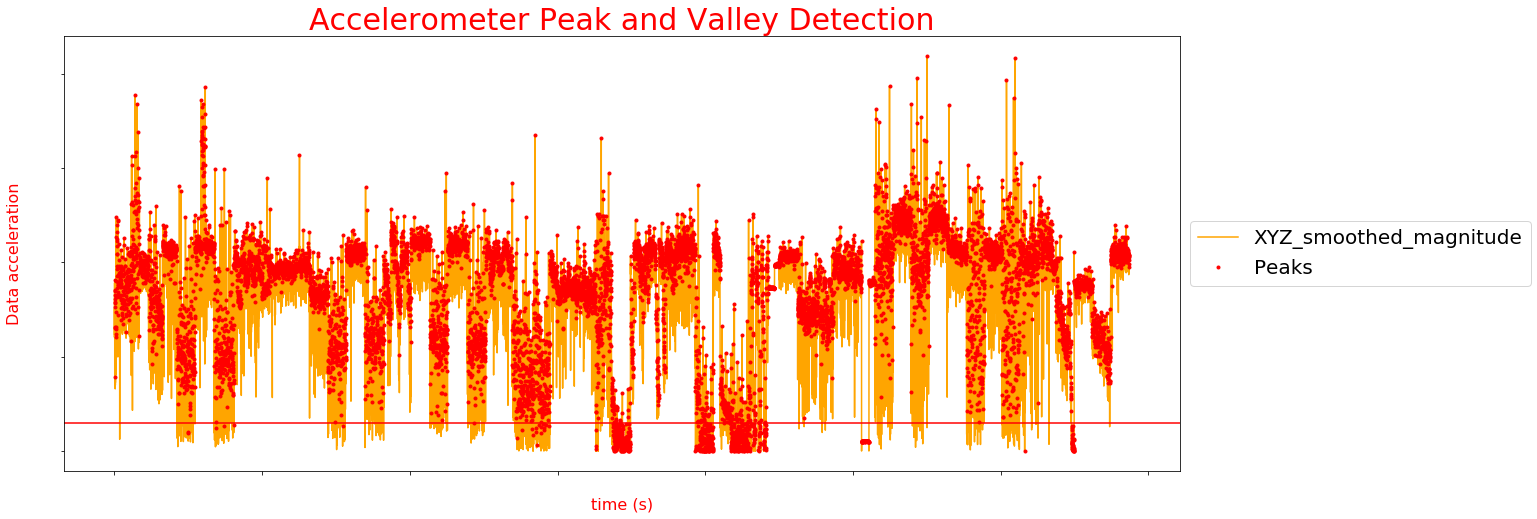

In [119]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
# plt.plot(t[valley], peak[valley], 'b.',label='valley')
plt.axhline(y=15
, color='r', linestyle='-')
plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [120]:
plt.figure(figsize=(30,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
     
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

IndentationError: expected an indented block (<ipython-input-120-259e38888964>, line 5)

Calculate The Hight of each wave

In [287]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


Calculate the Mean of every wave

In [288]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


Calculating the width of each wave

In [289]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])


Calculating The standered deviassion of each wave

In [290]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


In [291]:
list_of_valley

[294,
 419,
 477,
 508,
 545,
 581,
 611,
 627,
 641,
 666,
 686,
 721,
 812,
 831,
 918,
 1011,
 1066,
 1123,
 1153,
 1189,
 1255,
 1301,
 1324,
 1367,
 1395,
 1437,
 1535,
 1581,
 1605,
 1654,
 1671,
 1726,
 1779,
 1813,
 1840,
 1868,
 1896,
 1932,
 1998,
 2087,
 2129,
 2151,
 2185,
 2226,
 2307,
 2355,
 2380,
 2440,
 2462,
 2487,
 2516,
 2560,
 2616,
 2640,
 2682,
 2719,
 2765,
 2814,
 2849,
 2897,
 2939,
 3002,
 3106,
 3142,
 3162,
 3233,
 3266,
 3292,
 3318,
 3355,
 3408,
 3462,
 3537,
 3554,
 3651,
 3703,
 3727,
 3761,
 3806,
 3845,
 3910,
 3937,
 4026,
 4047,
 4073,
 4156,
 4197,
 4259,
 4333,
 4387,
 4409,
 4459,
 4487,
 4511,
 4536,
 4569,
 4623,
 4704,
 4739,
 4802,
 4836,
 4865,
 4890,
 4912,
 4978,
 5013,
 5035,
 5098,
 5164,
 5263,
 5321,
 5361,
 5386,
 5429,
 5456,
 5476,
 5540,
 5558,
 5588,
 5619,
 5737,
 5801,
 5818,
 5879,
 5915,
 6038,
 6095,
 6135,
 6226,
 6262,
 6302,
 6349,
 6588,
 6682,
 6740,
 6860,
 6887,
 6945,
 7002,
 7045,
 7063,
 7090,
 7134,
 7167,
 7227,


In [292]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [293]:
df_feature.shape

(37246, 4)

In [294]:
list_of_label=[]

In [295]:
counter=0
for i in  list_of_valley:
    x=df['label'].loc[i]
    list_of_label.append(x)  

    

In [296]:
df_feature['label']=list_of_label

In [297]:
df_feature['label'].value_counts()

Walking       12510
Jogging        5855
Standing       5351
Sitting        5151
Downstairs     4496
Upstairs       3883
Name: label, dtype: int64

In [298]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,1.012939,0.010249,0.089195,294.0,Standing
1,1.012464,0.007102,0.042663,125.0,Standing
2,1.012287,0.006789,0.039088,58.0,Standing
3,1.013333,0.014112,0.061664,31.0,Standing
4,1.009600,0.007052,0.026886,37.0,Standing


In [299]:
df_feature['label'].value_counts()

Walking       12510
Jogging        5855
Standing       5351
Sitting        5151
Downstairs     4496
Upstairs       3883
Name: label, dtype: int64

In [329]:
x_test.shape

NameError: name 'x_test' is not defined

In [331]:
X=X_test
y=np.array(train_labels)

In [332]:
X.shape

(28738, 18)

In [333]:
y.shape

(28738,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [290]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (15194, 94)
X_test_shape ----> (6512, 94)
Y_train_shape ----> (15194,)
Y_test_shape ----> (6512,)


During train uncomment this cell

### Preprocessimg label data and feature

In [334]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
y_independent=le.fit_transform(y)


In [335]:
z=le.inverse_transform(np.unique(y_labeled))


In [336]:
z

array(['Downstairs', 'Jogging', 'Sitting ', 'Standing ', 'Upstairs ',
       'Walking'], dtype='<U10')

During train uncomment this line and change y to y_train

In [337]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
x_independent=sc.fit_transform(X)


During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [295]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data SVC is  : ", cv_svm_test.mean())



Cross validation for train data SVC is :  0.9447808427254537
Cross validation for test data SVC is  :  0.9322789373397834


During train uncomment this cell

Confusion matrix is :
  [[ 479    5    0    0   70   44]
 [   4 1936    1    0   11   20]
 [   0    0  359   10    2    0]
 [   0    0    1  283    1    1]
 [  46   16    1    2  617   33]
 [  20    5    0    1   23 2521]]


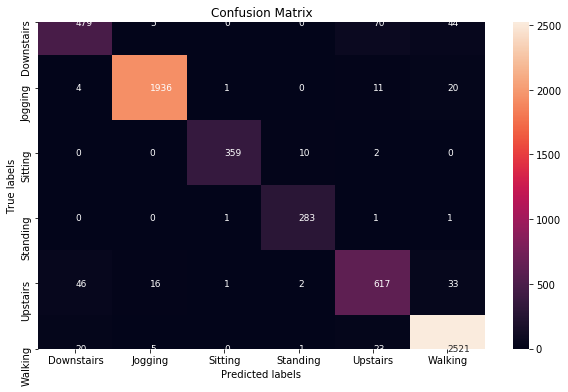

In [296]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [297]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

KeyboardInterrupt: 

In [298]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.9676189915511203
Cross validation for test data KNN is :  0.9551609294703751


During train uncomment this cell

Confusion matrix is :
  [[ 566    5    0    0   20    7]
 [   6 1957    1    0    8    0]
 [   0    0  365    3    2    1]
 [   3    0    8  274    1    0]
 [  55   11    2    1  635   11]
 [  24    4    0    0   14 2528]]


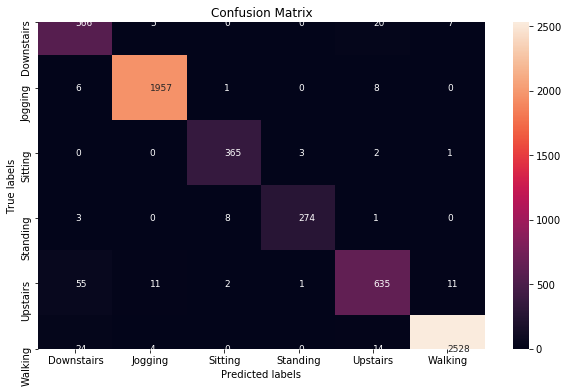

In [299]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using Random forest Classifier

In [ ]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [300]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 36, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.9496510477016272
Cross validation for test data RF is :  0.9336607182657018


During train uncomment this cell

Confusion matrix is :
  [[ 501    7    0    0   41   49]
 [   6 1950    1    0    7    8]
 [   1    0  364    4    2    0]
 [   1    0    1  283    0    1]
 [  35   30    0    1  603   46]
 [  16    6    0    1   14 2533]]


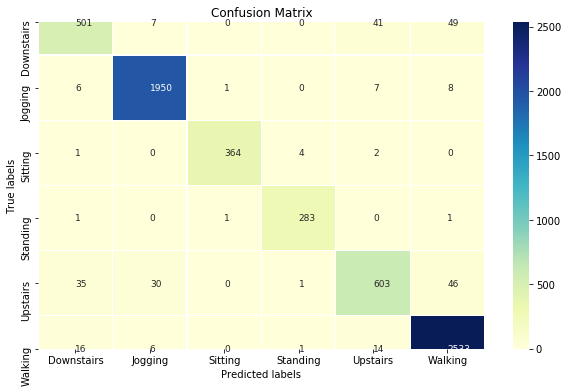

In [301]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [ ]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [302]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 11,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.9020666043904232
Cross validation for test data DT is :  0.8846738285216169


During train uncomment this cell

Confusion matrix is :
  [[ 410   13    1    0   95   79]
 [   9 1912    0    0   33   18]
 [   1    0  360    9    0    1]
 [   1    0    5  279    0    1]
 [  82   27    4    1  523   78]
 [  53   11    0    1   59 2446]]


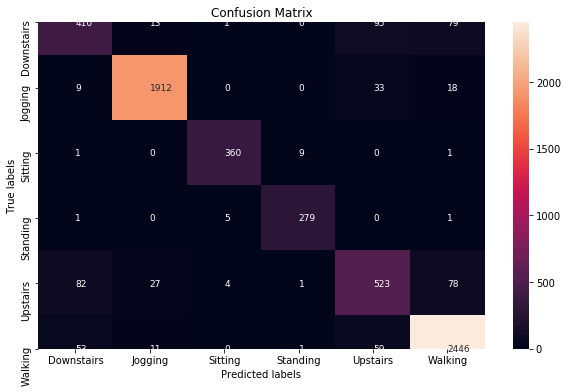

In [303]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [304]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data NB is : ", cv_nv_test)


Cross validation for train data NB is :  [0.79447187 0.79960513 0.79699842]
Cross validation for test data NB is :  [0.78811608 0.80377706 0.78202765]


During train uncomment this cell

Confusion matrix is :
  [[ 373   24    0    0  105   96]
 [   9 1876    0    0   44   43]
 [   0    0  346   15    8    2]
 [   0    0    3  277    5    1]
 [ 209   65    0    1  370   70]
 [ 168  127    0    0  295 1980]]


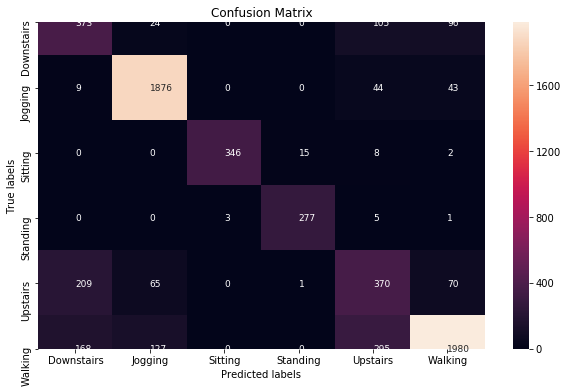

In [305]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [306]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

Accuracy of SVC          ---------> 0.95
Accuracy of Desicion Tree---------> 0.91
Accuracy of Random forest---------> 0.96
Accuracy of KNN          ---------> 0.97
Accuracy of Navie Bayes  ---------> 0.8


During train uncomment this cell

In [338]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)


ValueError: X.shape[1] = 18 should be equal to 94, the number of features at training time

During train **comment** this cell

In [326]:
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.22
Accuracy of Desicion Tree---------> 0.21
Accuracy of Random forest---------> 0.2
Accuracy of KNN          ---------> 0.21
Accuracy of Navie Bayes  ---------> 0.21


Confusion matrix is :
  [[   6  662    0    0    1 3827]
 [   0 5627    0    0    0  228]
 [ 969   20    0    0   12 4150]
 [ 668    4    0    0    7 4672]
 [   6  298    0    0    0 3579]
 [   3 3431    0    0    0 9076]]


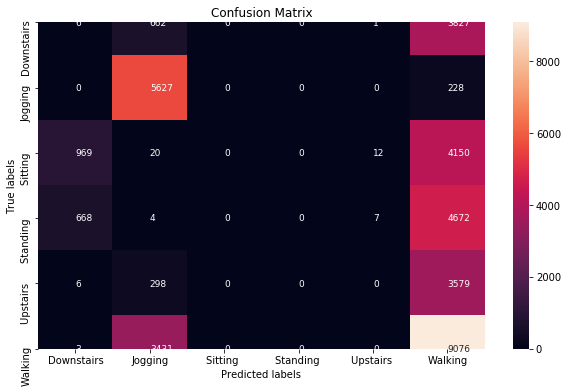

During train **comment** this cell